<img src="Electronic_Brain.png" width="200" style="float:left">
<h1> Summer 2021 ML Course.</h1>
<h2> Exercise 3: PSD Estimation on Non-regularly Sampled Data<br>Tools: Numpy, SciPy</h2>

In [2]:
import numpy as np
import scipy.interpolate as interp
import scipy.signal as signal
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
# Set chart defaults.
plt.rcParams['figure.figsize'] = [12, 5]

In [4]:
# ----------------------------------------------------------------------------
# Additive white Gaussian noise.
# ----------------------------------------------------------------------------
def awgn(y, snr_db):
    snr = 10 ** (-snr_db / 10.0)
    xpower = np.sum(y ** 2) / len(y)
    npower = xpower / snr
    return(np.random.randn(len(y)) * np.sqrt(npower) + y)

In [5]:
# ----------------------------------------------------------------------------
# The original function is a sum of sinusoids (frequencies given in sin_freqs).
# The function returns a bunch of uneven but clean samples.
# ----------------------------------------------------------------------------
def base_sig(sin_freqs, samp_comb):
    sig = np.zeros(len(samp_comb))
    for freq in sin_freqs:
        sig += np.cos(2*np.pi * freq * samp_comb)
    return(sig)

In [6]:
sin_freqs = [10, 20, 50]            # In Hz.
samp_freq = 200                     # In Hz.
num_samps = 1024

# Define a sampling comb, use it to obtain a clean signal, then add noise.
samp_comb = num_samps / samp_freq * np.random.rand(num_samps)
samp_comb = np.sort(samp_comb)  # Get the comb sorted.
clean_sig = base_sig(sin_freqs, samp_comb)
messy_sig = awgn(clean_sig, 10) # Add 10dB of white noise.

<img src="desktop-computer-icon.png" width="90" style="float:left; margin-right: 10px;">
<img src="Roni_Roshbakir.png" width="36" style="float:left; margin-right: 10px;">
</br>Please Help Roni estimate the spectrum while ignoring the timestamps.</br>

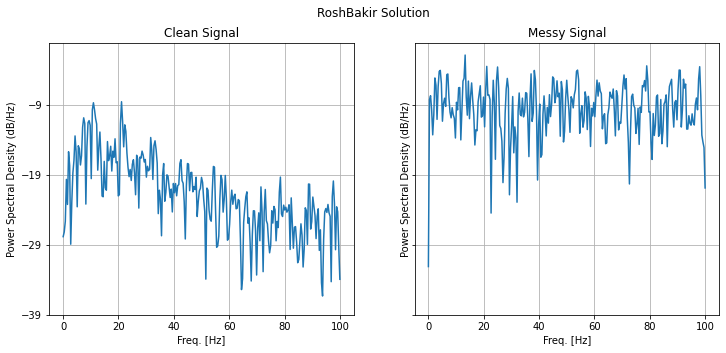

In [7]:
fig, axs = plt.subplots(1,2, sharey=True)
axs[0].psd(clean_sig, NFFT=512, Fs=samp_freq)
axs[0].set(xlabel='Freq. [Hz]', title='Clean Signal')
# axs[1].psd(messy_sig, num_samps, samp_freq)
axs[1].psd(messy_sig, NFFT=512, Fs=samp_freq)
axs[1].set(xlabel='Freq. [Hz]', title='Messy Signal')
plt.suptitle("RoshBakir Solution");

<img src="desktop-computer-icon.png" width="90" style="float:left; margin-right: 10px;">
<img src="Motti_Mithakem.png" width="60" style="float:left; margin-right: 10px;">
</br>Please Help Motti estimate the spectrum via linear interpolation (hint: np.interp()).</br>

In [8]:
# Motti's solution: set up a uniform and (optionally) up-sampled comb, interpolate the signal onto it.
upsample_factor = 1
interp_comb = np.linspace(0.01, max(samp_comb), num_samps * upsample_factor)
interp_clean_sig = np.interp(x=interp_comb, xp=samp_comb, fp=clean_sig)
interp_messy_sig = np.interp(x=interp_comb, xp=samp_comb, fp=messy_sig)

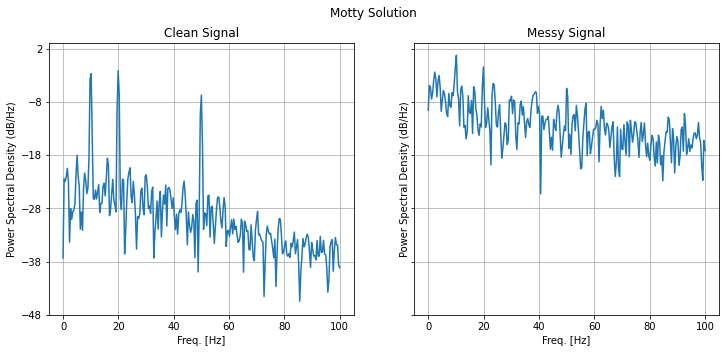

In [9]:
fig, axs = plt.subplots(1,2, sharey=True)
axs[0].psd(interp_clean_sig, NFFT=512, Fs=samp_freq * upsample_factor)
axs[0].set(xlabel='Freq. [Hz]', title='Clean Signal')
axs[1].psd(interp_messy_sig, NFFT=512, Fs=samp_freq * upsample_factor)
axs[1].set(xlabel='Freq. [Hz]', title='Messy Signal')
plt.suptitle("Motty Solution");

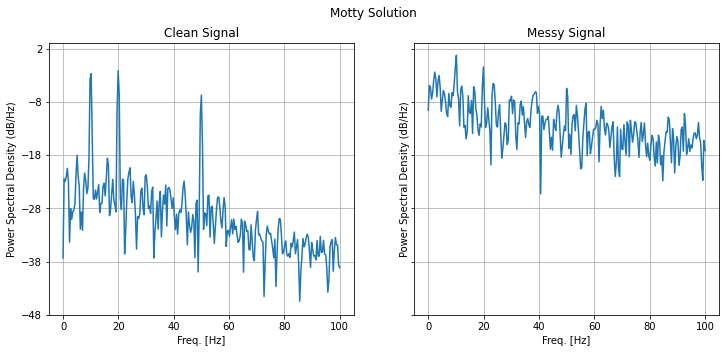

In [10]:
fig, axs = plt.subplots(1,2, sharey=True)
axs[0].psd(interp_clean_sig, NFFT=512, Fs=samp_freq * upsample_factor)
axs[0].set(xlabel='Freq. [Hz]', title='Clean Signal')
axs[1].psd(interp_messy_sig, NFFT=512, Fs=samp_freq * upsample_factor)
axs[1].set(xlabel='Freq. [Hz]', title='Messy Signal')
plt.suptitle("Motty Solution");

<img src="desktop-computer-icon.png" width="90" style="float:left; margin-right: 10px;">
<img src="Batya_Bingo.png" width="80" style="float:left; margin-right: 10px;">
</br>Please Help Batya optimally estimate the spectrum via a Lomb-Scargle periodogram (hint: scipy.signal.lombscargle()).

In [13]:
# Define array of freqs on which we estimate the periodogram:
lomb_freqs = 2 * np.pi * np.linspace(0.01, 100, 1000)
clean_pgram = signal.lombscargle(samp_comb, clean_sig, lomb_freqs)
messy_pgram = signal.lombscargle(samp_comb, messy_sig, lomb_freqs)

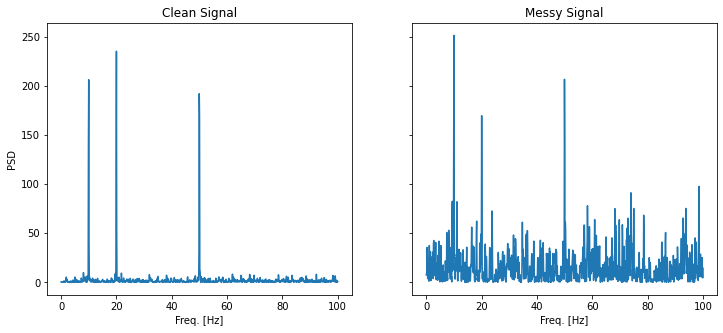

In [14]:
fig, axs = plt.subplots(1,2, sharey=True)
axs[0].plot(lomb_freqs / (2*np.pi), clean_pgram)
axs[0].set(xlabel='Freq. [Hz]', ylabel='PSD', title='Clean Signal')
axs[1].plot(lomb_freqs / (2*np.pi), messy_pgram)
axs[1].set(xlabel='Freq. [Hz]', title='Messy Signal');